# 데이터 불러오기

In [1]:
import pandas as pd


reviews = pd.read_csv('/home/sjkim/recommendSystem/finalproject/Amazon_reviews.csv', encoding='latin-1')
ratings = pd.read_csv('/home/sjkim/recommendSystem/finalproject/Amazon_ratings.csv', encoding='latin-1')

# reviews

In [2]:
reviews

,item_id,votes,verified,review_time,user_id,user_name,text
0,A1ER5AYS3FQ9O3,4,False,"09 2, 2008",0151004714,Kcorn,This is the kind of novel to read when you hav...
1,A3LXXYBYUHZWS5,NaN,False,"07 14, 2009",0446697192,Monie Garcia,"Fresh from Connecticut, Taylor Henning lands a..."
2,A1LVCDWBH1MMZ6,NaN,True,"04 11, 2015",0511189877,HMSEconomist,It's ok. Feels somewhat awkward in hand. SMALL...
3,A1H8PY3QHMQQA0,9,False,"11 24, 2010",0528881469,Dave M. Shaw,"Not going to write a long review, even thought..."
4,A3BY5KCNQZXV5U,4,False,"01 20, 2014",0594451647,Matenai,This product really works great but I found th...
...,...,...,...,...,...,...,...
242581,A1F7KIIWHPQ5TG,NaN,True,"09 17, 2018",B01HGV7M7Y,MPB,Great to use as a short extension cord because...
242582,A1FNPF8RU9JX2K,NaN,True,"07 27, 2018",B01HGV7M7Y,PipeFighter,Bought to go with my Kill-A Watt meter so I co...
242583,A3ISWIL5PPV55W,NaN,True,"09 21, 2018",B01HH36F74,Draugrs,This device works great with no issues. I use ...
242584,AIL8Q0STSY5Y5,NaN,True,"08 22, 2017",B01HHR777M,Mximo Rafael,I needed long SATA cables to add a Backup Driv...


In [3]:
# reviews 전체 데이터 개수 확인
len(reviews)

242586

In [4]:
# null값 확인
reviews.isna().sum()

item_id             0
votes          194153
verified            0
review_time         0
user_id             0
user_name          21
text                0
dtype: int64

In [5]:
# column별 null값 비율 -> votes 80%가 null값
for col in reviews.columns:
    msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (reviews[col].isnull().sum() / reviews[col].shape[0]))
    print(msg)

column:    item_id	 Percent of NaN Value: 0.00%
column:      votes	 Percent of NaN Value: 80.03%
column:   verified	 Percent of NaN Value: 0.00%
column: review_time	 Percent of NaN Value: 0.00%
column:    user_id	 Percent of NaN Value: 0.00%
column:  user_name	 Percent of NaN Value: 0.01%
column:       text	 Percent of NaN Value: 0.00%


In [6]:
# vote 결측치 제거 -> NaN을 0으로 채워 넣기
reviews['votes'] = reviews['votes'].fillna('0')

In [7]:
def sub(vote):
    return vote.replace(',', '')

# review_time , 제거
reviews['review_time'] = reviews['review_time'].apply(sub)

In [8]:
# vote 숫자 형식 제거
reviews['votes'] = reviews['votes'].apply(sub)

In [9]:
# vote 실수형으로 변경
reviews['votes'] = reviews['votes'].apply(float)

In [10]:
# vote 정수형으로 변경
reviews['votes'] = reviews['votes'].apply(int)

In [11]:
reviews['review_time'] = pd.to_datetime(reviews['review_time'])

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242586 entries, 0 to 242585
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   item_id      242586 non-null  object        
 1   votes        242586 non-null  int64         
 2   verified     242586 non-null  bool          
 3   review_time  242586 non-null  datetime64[ns]
 4   user_id      242586 non-null  object        
 5   user_name    242565 non-null  object        
 6   text         242586 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 11.3+ MB


In [13]:
# votes 가장 많이 받은 투표수
reviews['votes'].max()

4041

In [14]:
# 후기 투표수 별 개수
reviews['votes'].value_counts()

0       194153
2        14208
3         7636
4         4809
5         3403
         ...  
822          1
611          1
1339         1
519          1
336          1
Name: votes, Length: 488, dtype: int64

In [ ]:
# vote 수가 다양해서 그래프 그려도 딱히 안보일 것 같아서 대충 범주 나눈 후 그래프 그리기
def clustering(votes):
    if votes >= 1000:
        return '1000~4100'
    elif votes >= 500:
        return '500~999'
    elif votes >= 100:
        return '100~499'
    elif votes >= 50:
        return '50~99'
    else:
        return '0~49'

In [ ]:
reviews['votes'].apply(clustering)

0         0~49
1         0~49
2         0~49
3         0~49
4         0~49
          ... 
242581    0~49
242582    0~49
242583    0~49
242584    0~49
242585    0~49
Name: votes, Length: 242586, dtype: object

In [ ]:
# 범주 새로운 columns에 추가
reviews['votes category'] = reviews['votes'].apply(clustering)

In [ ]:
reviews.head()

,item_id,votes,verified,review_time,user_id,user_name,text,votes category
0,A1ER5AYS3FQ9O3,4,False,2008-09-02,0151004714,Kcorn,This is the kind of novel to read when you hav...,0~49
1,A3LXXYBYUHZWS5,0,False,2009-07-14,0446697192,Monie Garcia,"Fresh from Connecticut, Taylor Henning lands a...",0~49
2,A1LVCDWBH1MMZ6,0,True,2015-04-11,0511189877,HMSEconomist,It's ok. Feels somewhat awkward in hand. SMALL...,0~49
3,A1H8PY3QHMQQA0,9,False,2010-11-24,0528881469,Dave M. Shaw,"Not going to write a long review, even thought...",0~49
4,A3BY5KCNQZXV5U,4,False,2014-01-20,0594451647,Matenai,This product really works great but I found th...,0~49


In [ ]:
# vote 범주 개수 -> votes가 0인게 이미 너무 많아서 범주 나눠서 그래프 그려도 딱히 의미가 있을지는?
reviews['votes category'].value_counts()

0~49         240161
50~99          1273
100~499        1031
500~999          99
1000~4100        22
Name: votes category, dtype: int64

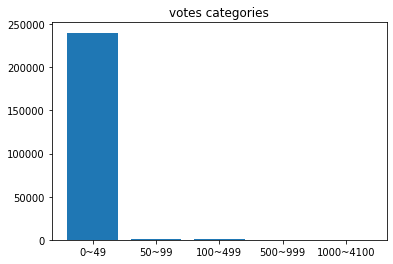

In [ ]:
# votes 시각화
import matplotlib.pyplot as plt
 
x = reviews['votes category'].value_counts().index.tolist()
y = reviews['votes category'].value_counts().values.tolist()

plt.bar(x, y)
plt.title('votes categories')
plt.show()

In [15]:
# 검증 된, 안된 후기 개수 카운트
reviews['verified'].value_counts()

True     202114
False     40472
Name: verified, dtype: int64

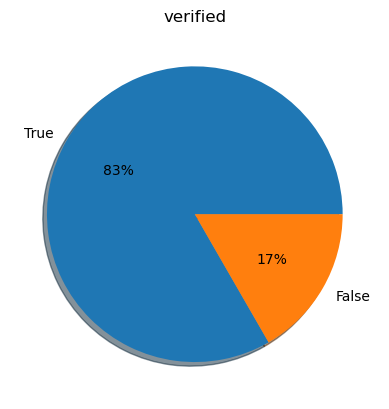

In [16]:
# verified 비율 시각화
import matplotlib.pyplot as plt
 
labels = reviews['verified'].value_counts().index.tolist()
ratio = reviews['verified'].value_counts().values.tolist()

plt.pie(ratio, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('verified')
plt.show()

In [ ]:
# verified False만 따로 votes수 정렬
reviews[reviews['verified']==False]['votes'].value_counts()

0       25237
2        3333
3        2106
4        1476
5        1061
        ...  
385         1
138         1
3034        1
325         1
492         1
Name: votes, Length: 384, dtype: int64

In [17]:
# review_time에서 연도만 따로 컬럼 생성
reviews['years'] = reviews['review_time'].dt.year
reviews

,item_id,votes,verified,review_time,user_id,user_name,text,years
0,A1ER5AYS3FQ9O3,4,False,2008-09-02,0151004714,Kcorn,This is the kind of novel to read when you hav...,2008
1,A3LXXYBYUHZWS5,0,False,2009-07-14,0446697192,Monie Garcia,"Fresh from Connecticut, Taylor Henning lands a...",2009
2,A1LVCDWBH1MMZ6,0,True,2015-04-11,0511189877,HMSEconomist,It's ok. Feels somewhat awkward in hand. SMALL...,2015
3,A1H8PY3QHMQQA0,9,False,2010-11-24,0528881469,Dave M. Shaw,"Not going to write a long review, even thought...",2010
4,A3BY5KCNQZXV5U,4,False,2014-01-20,0594451647,Matenai,This product really works great but I found th...,2014
...,...,...,...,...,...,...,...,...
242581,A1F7KIIWHPQ5TG,0,True,2018-09-17,B01HGV7M7Y,MPB,Great to use as a short extension cord because...,2018
242582,A1FNPF8RU9JX2K,0,True,2018-07-27,B01HGV7M7Y,PipeFighter,Bought to go with my Kill-A Watt meter so I co...,2018
242583,A3ISWIL5PPV55W,0,True,2018-09-21,B01HH36F74,Draugrs,This device works great with no issues. I use ...,2018
242584,AIL8Q0STSY5Y5,0,True,2017-08-22,B01HHR777M,Mximo Rafael,I needed long SATA cables to add a Backup Driv...,2017


In [18]:
# 연도별 리뷰 개수
reviews.groupby('years')['text'].count()

years
1999        3
2000       25
2001       67
2002      146
2003      201
2004      356
2005      543
2006      959
2007     1888
2008     2935
2009     4168
2010     4857
2011     7617
2012    12846
2013    26674
2014    40416
2015    51957
2016    48128
2017    28308
2018    10492
Name: text, dtype: int64

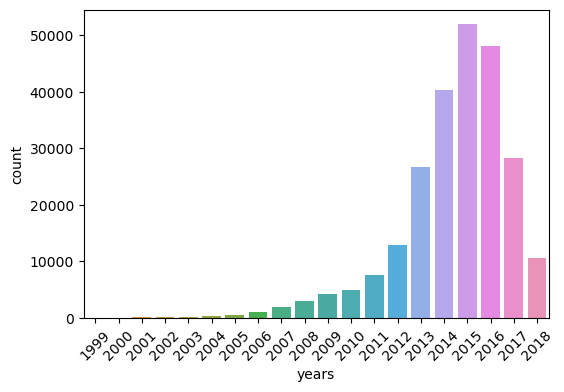

In [19]:
# 연도별 리뷰 개수 이미지화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='years', data=reviews)
plt.xticks(rotation=45)
plt.show()

In [20]:
# 제품별 리뷰 통합, text만 사용해서 제품 간 tf-idf로 유사한 제품 추천 가능
reviews.groupby('item_id').agg({'text':'sum'})

,text
item_id,
A07936821FOVJO6NP4Q8,"Very nice product. Sharp, clear optics. Seem..."
A1002O7Q4BOWMM,I'm not going into the detail about these sinc...
A1004703RC79J9,First of all this thing really works and it is...
A100UD67AHFODS,This USB cable performs flawlessly and the pri...
A1016KUT34PNBP,I finally have DVI outputs on all my computers...
...,...
AZYBZEVISD0YX,What more can I say? If you know what cable yo...
AZZ5ASC403N74,This bundled pack of cables from Amazon comes ...
AZZB7QPNM6ENC,"MSRP is $49.99\n\nGreat mouse, especially like..."


In [21]:
# 제품 별 리뷰 개수
reviews.groupby('item_id')['text'].count().sort_values(ascending=False)

item_id
A680RUE1FDO8B     274
A3OXHLG6DIBRW8    226
A1X1CEGHTHMBL1    180
A6FIAB28IS79      171
A1EXGL6L0QQ0M5    170
                 ... 
AXM3JTCBRGF19       1
A3DIAB2Q8SB77X      1
A33Q2BU7XZYVCI      1
A2JFEB2Z143JDG      1
AHYV6TVKILC8F       1
Name: text, Length: 16950, dtype: int64

# ratings

In [22]:
ratings

,item_id,user_id,rating,timestamp
0,A07936821FOVJO6NP4Q8,B0000A0AEM,3.0,1411171200
1,A07936821FOVJO6NP4Q8,B0000AI0N1,5.0,1404950400
2,A07936821FOVJO6NP4Q8,B0002RSPE4,5.0,1417737600
3,A07936821FOVJO6NP4Q8,B000CRFOMK,5.0,1413936000
4,A07936821FOVJO6NP4Q8,B000ID7QNI,5.0,1407715200
...,...,...,...,...
286178,AZZTOUKVTUMVM,B00HWT8I24,3.0,1455235200
286179,AZZTOUKVTUMVM,B00IX9ZDKC,5.0,1498521600
286180,AZZTOUKVTUMVM,B00TQD2BYK,4.0,1455235200
286181,AZZTOUKVTUMVM,B00UVPYCYY,5.0,1523404800


In [23]:
# timestamp datetime형식으로 바꾸기
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286183 entries, 0 to 286182
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   item_id    286183 non-null  object        
 1   user_id    286183 non-null  object        
 2   rating     286183 non-null  float64       
 3   timestamp  286183 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 8.7+ MB


In [26]:
# rating 개수
ratings['rating'].value_counts()

5.0    186710
4.0     52314
3.0     21483
1.0     14577
2.0     11099
Name: rating, dtype: int64

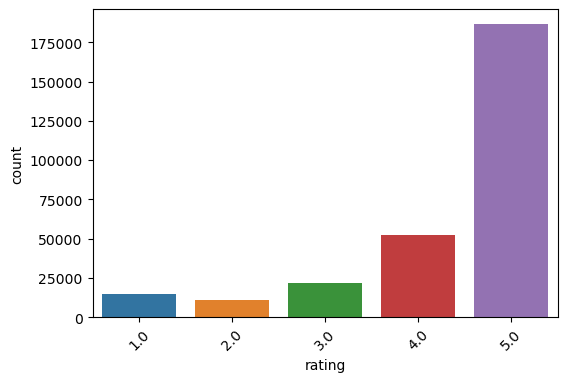

In [27]:
# ratings 분포
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=ratings)
plt.xticks(rotation=45)
plt.show()

In [28]:
# 유저의 아이템 별 평점
ratings.groupby(['user_id', 'item_id']).mean()

rating
user_id    item_id               
0151004714 A1ER5AYS3FQ9O3     5.0
0446697192 A3LXXYBYUHZWS5     5.0
0511189877 A1LVCDWBH1MMZ6     3.0
0528881469 A1H8PY3QHMQQA0     2.0
           A1UK9AVCT7J8CF     5.0
...                           ...
B01HJDR9DQ A2J190F2F2D3L7     5.0
B01HJF704M A1MW5TA0TW43TK     5.0
B01HJH42KU A10M6FB3OTYOUC     5.0
           A2OA7L9C94J61F     5.0
           A3KCDBPG4FYBL8     2.0

[286183 rows x 1 columns]

In [29]:
ratings.groupby(['user_id'])['item_id', 'rating'].count()

/home/sjkim/.conda/envs/seongju/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,item_id,rating
user_id,,
0151004714,1,1
0446697192,1,1
0511189877,1,1
0528881469,2,2
0594451647,1,1
...,...,...
B01HIWBNOY,1,1
B01HJBBR2C,1,1
B01HJDR9DQ,1,1


In [36]:
# 유저별 몇 개 아이템을 구매 했는지
user_buy = pd.DataFrame(ratings.groupby('user_id')['item_id'].count())
user_buy

,item_id
user_id,
0151004714,1
0446697192,1
0511189877,1
0528881469,2
0594451647,1
...,...
B01HIWBNOY,1
B01HJBBR2C,1
B01HJDR9DQ,1


In [33]:
# 아이템 1개만 구매한 user의 비율이 높음
ratings.groupby('user_id')['item_id'].count().value_counts()

1      12687
2       8133
3       5123
4       3499
5       2369
       ...  
234        1
344        1
384        1
225        1
111        1
Name: item_id, Length: 217, dtype: int64

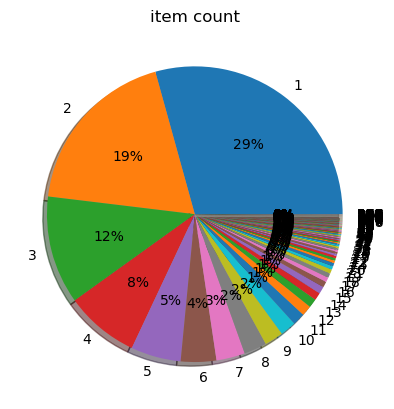

In [51]:
import matplotlib.pyplot as plt
 
labels = user_buy['item_id'].value_counts().index.tolist()
ratio = user_buy['item_id'].value_counts().values.tolist()

plt.pie(ratio, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('item count')
plt.show()

# item을 3개 이하로 산 사람이 60%인 상황에서 이 사람들한테 어떻게 해야 추천을 잘해줄 수 있을지 고민해봐야할듯 -> user_based 추천은 X, item_based로 가야할듯

## reviews, ratings 합치기

In [37]:
# ratings를 기준으로 reviews데이터랑 합치기
df = pd.merge(ratings, reviews, how='left', left_on=['item_id', 'user_id'], right_on=['item_id', 'user_id'])
df

,item_id,user_id,rating,timestamp,votes,verified,review_time,user_name,text,years
0,A07936821FOVJO6NP4Q8,B0000A0AEM,3.0,2014-09-20,0.0,True,2014-09-20,tmexrea,"Very nice product. Sharp, clear optics. Seem...",2014.0
1,A07936821FOVJO6NP4Q8,B0000AI0N1,5.0,2014-07-10,0.0,True,2014-07-10,tmexrea,"Just what it said it would be, well made, wort...",2014.0
2,A07936821FOVJO6NP4Q8,B0002RSPE4,5.0,2014-12-05,0.0,True,2014-12-05,tmexrea,Bought a bunch of these a few years ago for th...,2014.0
3,A07936821FOVJO6NP4Q8,B000CRFOMK,5.0,2014-10-22,0.0,False,2014-10-22,tmexrea,At first glance these seem silly. Who needs a...,2014.0
4,A07936821FOVJO6NP4Q8,B000ID7QNI,5.0,2014-08-11,0.0,True,2014-08-11,tmexrea,Very sturdy well made wall mount.,2014.0
...,...,...,...,...,...,...,...,...,...,...
286178,AZZTOUKVTUMVM,B00HWT8I24,3.0,2016-02-12,0.0,True,2016-02-12,DGBradley,It was a bit challenging to get this to synch ...,2016.0
286179,AZZTOUKVTUMVM,B00IX9ZDKC,5.0,2017-06-27,0.0,True,2017-06-27,DGBradley,What can I say. It worked great and my compute...,2017.0
286180,AZZTOUKVTUMVM,B00TQD2BYK,4.0,2016-02-12,0.0,True,2016-02-12,DGBradley,"It was a bit temperamental to get it set-up, b...",2016.0
286181,AZZTOUKVTUMVM,B00UVPYCYY,5.0,2018-04-11,0.0,True,2018-04-11,DGBradley,This is a great little speaker that I use all ...,2018.0


In [38]:
df.isnull().sum()
# rating있는데 text(리뷰) 없는 case : 43597개

item_id            0
user_id            0
rating             0
timestamp          0
votes          43597
verified       43597
review_time    43597
user_name      43618
text           43597
years          43597
dtype: int64

In [39]:
# timestamp == review_time이라서 하나 삭제
df.drop('review_time', axis=1, inplace=True)

In [40]:
df

,item_id,user_id,rating,timestamp,votes,verified,user_name,text,years
0,A07936821FOVJO6NP4Q8,B0000A0AEM,3.0,2014-09-20,0.0,True,tmexrea,"Very nice product. Sharp, clear optics. Seem...",2014.0
1,A07936821FOVJO6NP4Q8,B0000AI0N1,5.0,2014-07-10,0.0,True,tmexrea,"Just what it said it would be, well made, wort...",2014.0
2,A07936821FOVJO6NP4Q8,B0002RSPE4,5.0,2014-12-05,0.0,True,tmexrea,Bought a bunch of these a few years ago for th...,2014.0
3,A07936821FOVJO6NP4Q8,B000CRFOMK,5.0,2014-10-22,0.0,False,tmexrea,At first glance these seem silly. Who needs a...,2014.0
4,A07936821FOVJO6NP4Q8,B000ID7QNI,5.0,2014-08-11,0.0,True,tmexrea,Very sturdy well made wall mount.,2014.0
...,...,...,...,...,...,...,...,...,...
286178,AZZTOUKVTUMVM,B00HWT8I24,3.0,2016-02-12,0.0,True,DGBradley,It was a bit challenging to get this to synch ...,2016.0
286179,AZZTOUKVTUMVM,B00IX9ZDKC,5.0,2017-06-27,0.0,True,DGBradley,What can I say. It worked great and my compute...,2017.0
286180,AZZTOUKVTUMVM,B00TQD2BYK,4.0,2016-02-12,0.0,True,DGBradley,"It was a bit temperamental to get it set-up, b...",2016.0
286181,AZZTOUKVTUMVM,B00UVPYCYY,5.0,2018-04-11,0.0,True,DGBradley,This is a great little speaker that I use all ...,2018.0


In [41]:
# year항목 null값 채우기
df['years'] = df['timestamp'].dt.year
df

,item_id,user_id,rating,timestamp,votes,verified,user_name,text,years
0,A07936821FOVJO6NP4Q8,B0000A0AEM,3.0,2014-09-20,0.0,True,tmexrea,"Very nice product. Sharp, clear optics. Seem...",2014
1,A07936821FOVJO6NP4Q8,B0000AI0N1,5.0,2014-07-10,0.0,True,tmexrea,"Just what it said it would be, well made, wort...",2014
2,A07936821FOVJO6NP4Q8,B0002RSPE4,5.0,2014-12-05,0.0,True,tmexrea,Bought a bunch of these a few years ago for th...,2014
3,A07936821FOVJO6NP4Q8,B000CRFOMK,5.0,2014-10-22,0.0,False,tmexrea,At first glance these seem silly. Who needs a...,2014
4,A07936821FOVJO6NP4Q8,B000ID7QNI,5.0,2014-08-11,0.0,True,tmexrea,Very sturdy well made wall mount.,2014
...,...,...,...,...,...,...,...,...,...
286178,AZZTOUKVTUMVM,B00HWT8I24,3.0,2016-02-12,0.0,True,DGBradley,It was a bit challenging to get this to synch ...,2016
286179,AZZTOUKVTUMVM,B00IX9ZDKC,5.0,2017-06-27,0.0,True,DGBradley,What can I say. It worked great and my compute...,2017
286180,AZZTOUKVTUMVM,B00TQD2BYK,4.0,2016-02-12,0.0,True,DGBradley,"It was a bit temperamental to get it set-up, b...",2016
286181,AZZTOUKVTUMVM,B00UVPYCYY,5.0,2018-04-11,0.0,True,DGBradley,This is a great little speaker that I use all ...,2018


In [ ]:
df.isna().sum()

item_id          0
user_id          0
rating           0
timestamp        0
votes        43597
verified     43597
user_name    43618
text         43597
years            0
dtype: int64

In [47]:
df.groupby(['item_id', 'user_id']).mean()

rating  votes   years
item_id              user_id                          
A07936821FOVJO6NP4Q8 B0000A0AEM     3.0    0.0  2014.0
                     B0000AI0N1     5.0    0.0  2014.0
                     B0002RSPE4     5.0    0.0  2014.0
                     B000CRFOMK     5.0    0.0  2014.0
                     B000ID7QNI     5.0    0.0  2014.0
...                                 ...    ...     ...
AZZTOUKVTUMVM        B00HWT8I24     3.0    0.0  2016.0
                     B00IX9ZDKC     5.0    0.0  2017.0
                     B00TQD2BYK     4.0    0.0  2016.0
                     B00UVPYCYY     5.0    0.0  2018.0
                     B00WMCUMKW     5.0    0.0  2016.0

[286183 rows x 3 columns]

In [43]:
# item 별 평점 평균
df.groupby('item_id')['rating'].mean()

item_id
A07936821FOVJO6NP4Q8    4.571429
A0817634JN8YPQ7L8C4V    5.000000
A1002O7Q4BOWMM          4.615385
A1004703RC79J9          4.066667
A100UD67AHFODS          4.595745
                          ...   
AZYBZEVISD0YX           3.789474
AZZ5ASC403N74           3.769231
AZZB7QPNM6ENC           3.166667
AZZEPOCDCD1PN           4.916667
AZZTOUKVTUMVM           3.750000
Name: rating, Length: 17245, dtype: float64

In [44]:
# item별 평점 개수: 평점 제일 많은 건 277개, 제일 적은건 11개
df.groupby('item_id')['rating'].count().sort_values(ascending=False)

item_id
A680RUE1FDO8B     277
A3OXHLG6DIBRW8    237
A1X1CEGHTHMBL1    183
A1EXGL6L0QQ0M5    177
A6FIAB28IS79      177
                 ... 
A2JH8Y6MMKXJLO     11
A2JF7JIOX4XMCW     11
A2JBJ9QVI8J6OZ     11
AA0AKCUPVOM3Z      11
A2VLQWS8354DE5     11
Name: rating, Length: 17245, dtype: int64

In [45]:
# 유저별 아이템별 평점, 투표 수
df.groupby(['user_id', 'item_id']).mean()

rating  votes   years
user_id    item_id                              
0151004714 A1ER5AYS3FQ9O3     5.0    4.0  2008.0
0446697192 A3LXXYBYUHZWS5     5.0    0.0  2009.0
0511189877 A1LVCDWBH1MMZ6     3.0    0.0  2015.0
0528881469 A1H8PY3QHMQQA0     2.0    9.0  2010.0
           A1UK9AVCT7J8CF     5.0    2.0  2017.0
...                           ...    ...     ...
B01HJDR9DQ A2J190F2F2D3L7     5.0    0.0  2017.0
B01HJF704M A1MW5TA0TW43TK     5.0    0.0  2016.0
B01HJH42KU A10M6FB3OTYOUC     5.0    2.0  2016.0
           A2OA7L9C94J61F     5.0    0.0  2016.0
           A3KCDBPG4FYBL8     2.0    0.0  2016.0

[286183 rows x 3 columns]

In [48]:
# 유저별 남긴 rating 수
df.groupby('user_id')['rating'].count().sort_values(ascending=False)

user_id
B00009KLAE    560
B00004ZCJI    560
B00004ZCJJ    560
B00BWF5U0M    500
B00E055H5O    480
             ... 
B001GV008O      1
B0069WCOA2      1
B00TZJ0XWW      1
B00GBUT86U      1
0151004714      1
Name: rating, Length: 43298, dtype: int64

In [49]:
# item 별 리뷰 수
df.groupby('item_id')['text'].count().sort_values(ascending=False)

item_id
A680RUE1FDO8B     274
A3OXHLG6DIBRW8    226
A1X1CEGHTHMBL1    180
A6FIAB28IS79      171
A1EXGL6L0QQ0M5    170
                 ... 
A23CABJ4OU64Q       0
AVIY5E876UZRP       0
A1H0BL8KDVWJLF      0
A2QJNY91UV1T7X      0
A2308WNW01SXZE      0
Name: text, Length: 17245, dtype: int64

In [53]:
# 아이템 별 평점평균, 리뷰수 데이터
text_cnt = df.groupby('item_id')['text'].count().sort_values(ascending=False)
rating_mean = df.groupby('item_id')['rating'].mean()

txt_rat = pd.merge(text_cnt, rating_mean, how='left', on = 'item_id')
txt_rat = txt_rat[txt_rat['text'] > 0]
txt_rat

,text,rating
item_id,,
A680RUE1FDO8B,274,4.444043
A3OXHLG6DIBRW8,226,4.497890
A1X1CEGHTHMBL1,180,4.825137
A6FIAB28IS79,171,4.186441
A1EXGL6L0QQ0M5,170,4.508475
...,...,...
A3KN5CQEXPVTFU,1,4.615385
A2ABIYJQDQ5BS3,1,4.818182
A1CURR6GZRHM8D,1,5.000000


In [54]:
# 아이템 별 평점평균(rating_y), 평점수(rating_x) 데이터
rating_cnt = df.groupby('item_id')['rating'].count().sort_values(ascending=False)
rating_mean = df.groupby('item_id')['rating'].mean()

rat_rat = pd.merge(rating_cnt, rating_mean, how='left', on = 'item_id')
rat_rat = rat_rat[rat_rat['rating_x'] >= 0]
rat_rat

,rating_x,rating_y
item_id,,
A680RUE1FDO8B,277,4.444043
A3OXHLG6DIBRW8,237,4.497890
A1X1CEGHTHMBL1,183,4.825137
A1EXGL6L0QQ0M5,177,4.508475
A6FIAB28IS79,177,4.186441
...,...,...
A2JH8Y6MMKXJLO,11,4.636364
A2JF7JIOX4XMCW,11,3.454545
A2JBJ9QVI8J6OZ,11,4.090909


In [55]:
# 리뷰 수 길이
text_len = []

for text in df.text:
    leng = len(str(text).split())
    text_len.append(leng)

df['text_length'] = text_len
df

,item_id,user_id,rating,timestamp,votes,verified,user_name,text,years,text_length
0,A07936821FOVJO6NP4Q8,B0000A0AEM,3.0,2014-09-20,0.0,True,tmexrea,"Very nice product. Sharp, clear optics. Seem...",2014,52
1,A07936821FOVJO6NP4Q8,B0000AI0N1,5.0,2014-07-10,0.0,True,tmexrea,"Just what it said it would be, well made, wort...",2014,11
2,A07936821FOVJO6NP4Q8,B0002RSPE4,5.0,2014-12-05,0.0,True,tmexrea,Bought a bunch of these a few years ago for th...,2014,35
3,A07936821FOVJO6NP4Q8,B000CRFOMK,5.0,2014-10-22,0.0,False,tmexrea,At first glance these seem silly. Who needs a...,2014,135
4,A07936821FOVJO6NP4Q8,B000ID7QNI,5.0,2014-08-11,0.0,True,tmexrea,Very sturdy well made wall mount.,2014,6
...,...,...,...,...,...,...,...,...,...,...
286178,AZZTOUKVTUMVM,B00HWT8I24,3.0,2016-02-12,0.0,True,DGBradley,It was a bit challenging to get this to synch ...,2016,76
286179,AZZTOUKVTUMVM,B00IX9ZDKC,5.0,2017-06-27,0.0,True,DGBradley,What can I say. It worked great and my compute...,2017,30
286180,AZZTOUKVTUMVM,B00TQD2BYK,4.0,2016-02-12,0.0,True,DGBradley,"It was a bit temperamental to get it set-up, b...",2016,70
286181,AZZTOUKVTUMVM,B00UVPYCYY,5.0,2018-04-11,0.0,True,DGBradley,This is a great little speaker that I use all ...,2018,46


In [57]:
def len_categorize(n):
  num = (n//100)*100
  num = int(num)
  if num > 2500:
      num=2500
  else:
     pass
  
  return num

df['text_length'] = df['text_length'].apply(len_categorize)

In [58]:
# 리뷰 길이 별 평점평균
df.groupby('text_length')['rating'].mean()

text_length
0       4.427165
100     4.098210
200     4.084020
300     4.106278
400     4.104599
500     4.094850
600     4.118060
700     4.160169
800     4.110577
900     4.057522
1000    4.080247
1100    4.178571
1200    4.057692
1300    4.042254
1400    4.340206
1500    4.138462
1600    4.170732
1700    4.122449
1800    4.041667
1900    4.280000
2000    4.142857
2100    4.210526
2200    3.875000
2300    4.000000
2400    4.500000
2500    4.126984
Name: rating, dtype: float64